Лабораторна робота 4
виконав Філонов Дмитро ФБ-22

In [6]:
import pandas as pd
import numpy as np
import timeit
from IPython.display import display
import datetime

створив датафрейм і numpy array

In [24]:
np.set_printoptions(edgeitems=5)
df = pd.read_csv("data.csv", )
df = df.drop(df[df.eq("?").any(axis=1)].index)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.date
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']] = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']].astype(float)


np_arr = np.genfromtxt("data.csv", dtype=object, delimiter=',', skip_header=1)
np_arr = np_arr[~np.any(np_arr == b"?", axis=1)]
np_arr[:, 2:9] = np_arr[:, 2:9].astype(float)
np_arr[:, 0:2] = np_arr[:, 0:2].astype(str)
np_arr[:, 0] = np.array([datetime.datetime.strptime(date_str, '%d/%m/%Y').date() for date_str in np_arr[:, 0]])
np_arr[:, 1] = np.array([datetime.datetime.strptime(time_str, '%H:%M:%S').time() for time_str in np_arr[:, 1]])


C:\Users\dddddd\AppData\Local\Temp\ipykernel_22212\1907213279.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", )


1. Обрати всі домогосподарства, у яких загальна активна споживана
потужність перевищує 5 кВт.

In [25]:
def find_high_power_pd(df):
    return df[df['Global_active_power']>5]

def find_high_power_np(np_arr):
    return np_arr[np_arr[:, 2]>5]

dff = find_high_power_pd(df)
display(dff)
print(find_high_power_np(np_arr))
p = timeit.timeit("find_high_power_pd(df)", globals=globals(), number=10)
n = timeit.timeit("find_high_power_np(np_arr)", globals=globals(), number=10)
print("час для датафрейму", p, "\nдля numpy array", n)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,2006-12-16,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,2006-12-16,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...
2069356,2010-11-22,18:40:00,5.408,0.150,231.50,23.6,48.0,0.0,0.0
2069357,2010-11-22,18:41:00,5.528,0.144,232.48,24.6,53.0,0.0,0.0
2071586,2010-11-24,07:50:00,5.172,0.050,235.18,22.0,0.0,38.0,17.0
2071587,2010-11-24,07:51:00,5.750,0.000,234.40,24.6,0.0,39.0,17.0


[[datetime.date(2006, 12, 16) datetime.time(17, 25) 5.36 0.436 233.63
  23.0 0.0 1.0 16.0]
 [datetime.date(2006, 12, 16) datetime.time(17, 26) 5.374 0.498 233.29
  23.0 0.0 2.0 17.0]
 [datetime.date(2006, 12, 16) datetime.time(17, 27) 5.388 0.502 233.74
  23.0 0.0 1.0 17.0]
 [datetime.date(2006, 12, 16) datetime.time(17, 35) 5.412 0.47 232.78
  23.2 0.0 1.0 17.0]
 [datetime.date(2006, 12, 16) datetime.time(17, 36) 5.224 0.478 232.99
  22.4 0.0 1.0 16.0]
 ...
 [datetime.date(2010, 11, 22) datetime.time(18, 40) 5.408 0.15 231.5 23.6
  48.0 0.0 0.0]
 [datetime.date(2010, 11, 22) datetime.time(18, 41) 5.528 0.144 232.48
  24.6 53.0 0.0 0.0]
 [datetime.date(2010, 11, 24) datetime.time(7, 50) 5.172 0.05 235.18 22.0
  0.0 38.0 17.0]
 [datetime.date(2010, 11, 24) datetime.time(7, 51) 5.75 0.0 234.4 24.6
  0.0 39.0 17.0]
 [datetime.date(2010, 11, 25) datetime.time(7, 21) 5.074 0.24 238.55 21.4
  1.0 2.0 18.0]]
час для датафрейму 0.05754559999331832 
для numpy array 0.7141272000153549


2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [72]:
def find_high_voltage_pd(df):
    return df[df['Voltage']>235]

def find_high_voltage_np(np_arr):
    return np_arr[np_arr[:, 4]>235]

dff = find_high_voltage_pd(df)
display(dff)
print(find_high_voltage_np(np_arr))
p = timeit.timeit("find_high_voltage_pd(df)", globals=globals(), number=1)
n = timeit.timeit("find_high_voltage_np(np_arr)", globals=globals(), number=1)
print("час для датафрейму", p, "\nдля numpy array", n)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,2006-12-16,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


[[datetime.date(2006, 12, 16) datetime.time(17, 28) 3.666 0.528 235.68
  15.8 0.0 1.0 17.0]
 [datetime.date(2006, 12, 16) datetime.time(17, 29) 3.52 0.522 235.02
  15.0 0.0 2.0 17.0]
 [datetime.date(2006, 12, 16) datetime.time(17, 30) 3.702 0.52 235.09
  15.8 0.0 1.0 17.0]
 [datetime.date(2006, 12, 16) datetime.time(17, 31) 3.7 0.52 235.22 15.8
  0.0 1.0 17.0]
 [datetime.date(2006, 12, 16) datetime.time(17, 38) 4.054 0.422 235.24
  17.6 0.0 1.0 17.0]
 ...
 [datetime.date(2010, 11, 26) datetime.time(20, 58) 0.946 0.0 240.43 4.0
  0.0 0.0 0.0]
 [datetime.date(2010, 11, 26) datetime.time(20, 59) 0.944 0.0 240.0 4.0
  0.0 0.0 0.0]
 [datetime.date(2010, 11, 26) datetime.time(21, 0) 0.938 0.0 239.82 3.8
  0.0 0.0 0.0]
 [datetime.date(2010, 11, 26) datetime.time(21, 1) 0.934 0.0 239.7 3.8
  0.0 0.0 0.0]
 [datetime.date(2010, 11, 26) datetime.time(21, 2) 0.932 0.0 239.55 3.8
  0.0 0.0 0.0]]
час для датафрейму 0.14896910000243224 
для numpy array 0.27130869997199625


3. Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [73]:
def find_intensity_pd(df):
    return df[(df['Global_intensity'].between(19, 20))&(df['Sub_metering_2']>df['Sub_metering_3'])]

def find_intensity_np(np_arr):
    return np_arr[(np_arr[:, 5]>=19)&(np_arr[:, 5]<=20)&(np_arr[:, 7]>np_arr[:, 8])]
dff = find_intensity_pd(df)
display(dff)
print(find_intensity_np(np_arr))
p = timeit.timeit("find_intensity_pd(df)", globals=globals(), number=10)
n = timeit.timeit("find_intensity_np(np_arr)", globals=globals(), number=10)
print("час для датафрейму", p, "\nдля numpy array", n)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,2006-12-16,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
460,2006-12-17,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
464,2006-12-17,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
475,2006-12-17,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
476,2006-12-17,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...
2071589,2010-11-24,07:53:00,4.666,0.000,235.72,19.8,0.0,39.0,17.0
2071590,2010-11-24,07:54:00,4.694,0.000,236.78,19.8,0.0,39.0,18.0
2071591,2010-11-24,07:55:00,4.602,0.000,237.08,19.4,0.0,40.0,17.0
2071592,2010-11-24,07:56:00,4.536,0.000,237.03,19.0,0.0,39.0,17.0


[[datetime.date(2006, 12, 16) datetime.time(18, 9) 4.464 0.136 234.66
  19.0 0.0 37.0 16.0]
 [datetime.date(2006, 12, 17) datetime.time(1, 4) 4.582 0.258 238.08 19.6
  0.0 13.0 0.0]
 [datetime.date(2006, 12, 17) datetime.time(1, 8) 4.618 0.104 239.61 19.6
  0.0 27.0 0.0]
 [datetime.date(2006, 12, 17) datetime.time(1, 19) 4.636 0.14 237.37 19.4
  0.0 36.0 0.0]
 [datetime.date(2006, 12, 17) datetime.time(1, 20) 4.634 0.152 237.17
  19.4 0.0 35.0 0.0]
 ...
 [datetime.date(2010, 11, 24) datetime.time(7, 53) 4.666 0.0 235.72 19.8
  0.0 39.0 17.0]
 [datetime.date(2010, 11, 24) datetime.time(7, 54) 4.694 0.0 236.78 19.8
  0.0 39.0 18.0]
 [datetime.date(2010, 11, 24) datetime.time(7, 55) 4.602 0.0 237.08 19.4
  0.0 40.0 17.0]
 [datetime.date(2010, 11, 24) datetime.time(7, 56) 4.536 0.0 237.03 19.0
  0.0 39.0 17.0]
 [datetime.date(2010, 11, 24) datetime.time(7, 57) 4.626 0.0 236.78 19.4
  0.0 39.0 17.0]]
час для датафрейму 0.11169940000399947 
для numpy array 1.7025146000087261


4. Обрати випадковим чином 500000 домогосподарств (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії, а також

In [74]:
def find_avg_pd(df):
    df_random = df.sample(n=500000)
    print('Sub_metering_1 avg:', df_random['Sub_metering_1'].mean())
    print('Sub_metering_2 avg:', df_random['Sub_metering_2'].mean())
    print('Sub_metering_3 avg:', df_random['Sub_metering_3'].mean())

def find_avg_np(np_arr):
    num_rows = np_arr.shape[0]
    random_row = np.random.choice(num_rows, size=500000, replace=False)
    np_arr_random = np_arr[random_row, :]
    print('Sub_metering_1 avg:', np.mean(np_arr_random[:, 6]))
    print('Sub_metering_2 avg:', np.mean(np_arr_random[:, 7]))
    print('Sub_metering_3 avg:', np.mean(np_arr_random[:, 8]))
print('for pd')
p = timeit.timeit("find_avg_pd(df)", globals=globals(), number=1)
print('for np')
n = timeit.timeit("find_avg_np(np_arr)", globals=globals(), number=1)
print("час для датафрейму", p, "\nдля numpy array", n)

for pd
Sub_metering_1 avg: 1.125194
Sub_metering_2 avg: 1.299288
Sub_metering_3 avg: 6.475258
for np
Sub_metering_1 avg: 1.136762
Sub_metering_2 avg: 1.304286
Sub_metering_3 avg: 6.466122
час для датафрейму 0.27629049998358823 
для numpy array 0.4576025000133086


5. Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [86]:
def find_highpower_pd(df):
    df_highpower = df.sample(n=500000)
    df_highpower = df_highpower[(df_highpower['Time']>datetime.time(18,0,0)) & (df_highpower['Global_active_power']>6) & (df_highpower['Sub_metering_2']>df_highpower['Sub_metering_3']) & (df_highpower['Sub_metering_2']>df_highpower['Sub_metering_1'])]
    half_len = len(df) // 2
    df_highpower = pd.concat([df_highpower.iloc[:half_len:3], df_highpower.iloc[half_len::4]])
    return df_highpower

def find_highpower_np(np_arr):
    num_rows = np_arr.shape[0]
    random_row = np.random.choice(num_rows, size=500000, replace=False)
    np_arr_random = np_arr[random_row, :]
    np_arr_random = np_arr_random[(np_arr_random[:, 2]>6)&(np_arr_random[:, 1]>datetime.time(18,0,0))&(np_arr_random[:, 7]>np_arr_random[:, 6])&(np_arr_random[:, 7]>np_arr_random[:, 8])]
    rows = np_arr_random.shape[0]

    np_arr1 = np_arr_random [:rows//2:3, :]
    np_arr2 = np_arr_random [rows//2::4, :]
    return np.concatenate((np_arr1, np_arr2), axis=0)

dff = find_highpower_pd(df)
display(dff)
print(find_highpower_np(np_arr))
p = timeit.timeit("find_highpower_pd(df)", globals=globals(), number=1)
n = timeit.timeit("find_highpower_np(np_arr)", globals=globals(), number=1)
print("час для датафрейму", p, "\nдля numpy array", n)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
286853,2007-07-03,22:17:00,6.182,0.198,232.50,27.0,0.0,62.0,17.0
2066473,2010-11-20,18:37:00,6.310,0.412,229.89,27.8,15.0,35.0,16.0
1150778,2009-02-22,21:02:00,6.698,0.406,236.93,28.2,1.0,73.0,0.0
2043476,2010-11-04,19:20:00,6.184,0.638,235.97,26.8,23.0,35.0,1.0
17503,2006-12-28,21:07:00,7.248,0.000,235.34,30.8,1.0,72.0,17.0
...,...,...,...,...,...,...,...,...,...
515625,2007-12-09,19:09:00,6.182,0.192,230.28,26.8,0.0,34.0,16.0
115411,2007-03-06,20:55:00,6.508,0.124,234.85,27.6,0.0,38.0,17.0
666898,2008-03-23,20:22:00,6.246,0.216,234.55,26.8,14.0,37.0,17.0
60873,2007-01-27,23:57:00,6.204,0.000,239.66,25.8,0.0,37.0,17.0


[[datetime.date(2006, 12, 29) datetime.time(21, 20) 6.424 0.116 229.89
  27.8 0.0 69.0 0.0]
 [datetime.date(2008, 6, 8) datetime.time(21, 43) 7.028 0.16 234.83 29.8
  0.0 73.0 18.0]
 [datetime.date(2007, 12, 9) datetime.time(19, 26) 6.17 0.286 230.36 26.8
  0.0 34.0 16.0]
 [datetime.date(2007, 3, 4) datetime.time(19, 40) 6.504 0.256 234.0 27.8
  0.0 71.0 17.0]
 [datetime.date(2009, 6, 16) datetime.time(18, 26) 6.17 0.088 235.05 26.2
  0.0 37.0 18.0]
 [datetime.date(2008, 11, 23) datetime.time(18, 15) 7.61 0.47 229.69 33.2
  0.0 36.0 17.0]
 [datetime.date(2008, 2, 2) datetime.time(19, 38) 6.152 0.588 232.42 26.6
  1.0 36.0 16.0]
 [datetime.date(2010, 1, 15) datetime.time(20, 55) 7.86 0.446 235.61 33.6
  9.0 74.0 18.0]
 [datetime.date(2007, 1, 7) datetime.time(18, 6) 6.676 0.0 230.88 28.8
  0.0 69.0 16.0]
 [datetime.date(2007, 3, 4) datetime.time(19, 45) 6.372 0.142 233.3 27.2
  0.0 71.0 17.0]
 [datetime.date(2007, 7, 6) datetime.time(21, 18) 7.24 0.448 235.04 31.0
  1.0 68.0 17.0]
 [dat

              друга частина 

In [17]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

створив dataframe і numpy array 

In [8]:
np.set_printoptions(edgeitems=7)
df = pd.read_csv("data2.csv")
df['Classes'] = df["Classes"].str.strip()
df['year'] = pd.to_datetime(df[["year", "month", "day"]])
df.drop(columns=["month", "day"], inplace=True)
df.rename(columns={"year":"date"}, inplace=True)

np_arr = np.genfromtxt("data2.csv", dtype=object, delimiter=',', skip_header=1)
np_arr[:,0] = np.array([np.datetime64(f"{int(y)}-{int(m):02d}-{int(d):02d}") for d,m,y in np_arr[:,0:3]])
np_arr = np.delete(np_arr, [1,2], axis=1)
np_arr[:, 1:11] = np_arr[:, 1:11].astype(float)
np_arr[:, 12] = np_arr[:, 12].astype(int)
np_arr[:, 11] = np_arr[:, 11].astype(str)
np_arr[:, 11] = [i.strip() for i in np_arr[:, 11]]


1. Поборотися із зниклими даними.

In [18]:
df = df.dropna()
np_arr = np_arr[~np.any(np.isnan(np_arr[:, 1:11].astype(float)), axis=1)]
np_arr
df

,date,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2012-06-01,28,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2012-06-02,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2012-06-03,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,2012-06-04,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,2012-06-05,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2012-09-26,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,2012-09-27,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,2012-09-28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,2012-09-29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


2. Пронормувати вибраний датасет або стандартизувати його

In [10]:
def norm_df(df):
    for column, i in df.items():
        if column in ["date", "Classes", "Region"]:
            continue
        df[column] = (i - df[column].min())/(df[column].max() - df[column].min())
    return df
def std_df(df):
    for column, i in df.items():
        if column in ["date", "Classes", "Region"]:
            continue
        df[column] = (i - df[column].mean())/df[column].std()
    return df

def norm_np(np_arr):
    for i in range(1, 11): 
        np_arr[:,i] = (np_arr[:,i] - np_arr[:,i].min())/(np_arr[:,i].max() - np_arr[:,i].min())
    return np_arr
def std_np(np_arr):
    for i in range(1, 11): 
        np_arr[:,i] = (np_arr[:,i] - np_arr[:,i].mean())/np_arr[:,i].std()
    return np_arr



3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

<Axes: xlabel='FWI', ylabel='Count'>

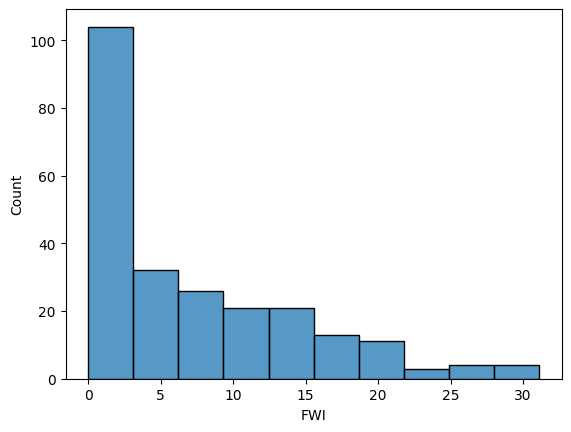

In [11]:
sns.histplot(df["FWI"], bins=10)

4. Збудувати графік залежності одного integer/real атрибута від іншого.

<Axes: xlabel='Rain', ylabel='FWI'>

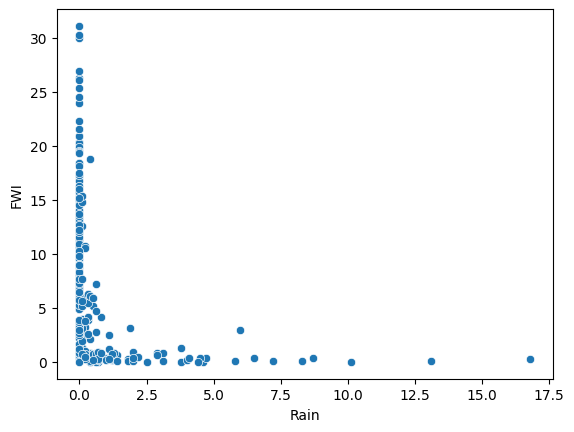

In [12]:
sns.scatterplot(x=df['Rain'], y=df['FWI'])


5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [13]:
pearson, _ = pearsonr(df['Rain'], df['Ws'])
spearman, _ = spearmanr(df['Rain'], df['Ws'])
print("pearsonr", pearson)
print("spearman", spearman)

pearsonr 0.16650992672517084
spearman -0.008200281841904354


6. Провести One Hot Encoding категоріального string атрибуту.

In [14]:

one_hot_encoded = pd.get_dummies(df['Classes'])
dff = pd.concat([df, one_hot_encoded], axis=1)



fire_column = np_arr[:, -2].reshape(-1, 1)
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(fire_column).toarray()
combined_array = np.concatenate((np_arr, encoded_data), axis=1)

7. Провести візуалізацію багатовимірних даних



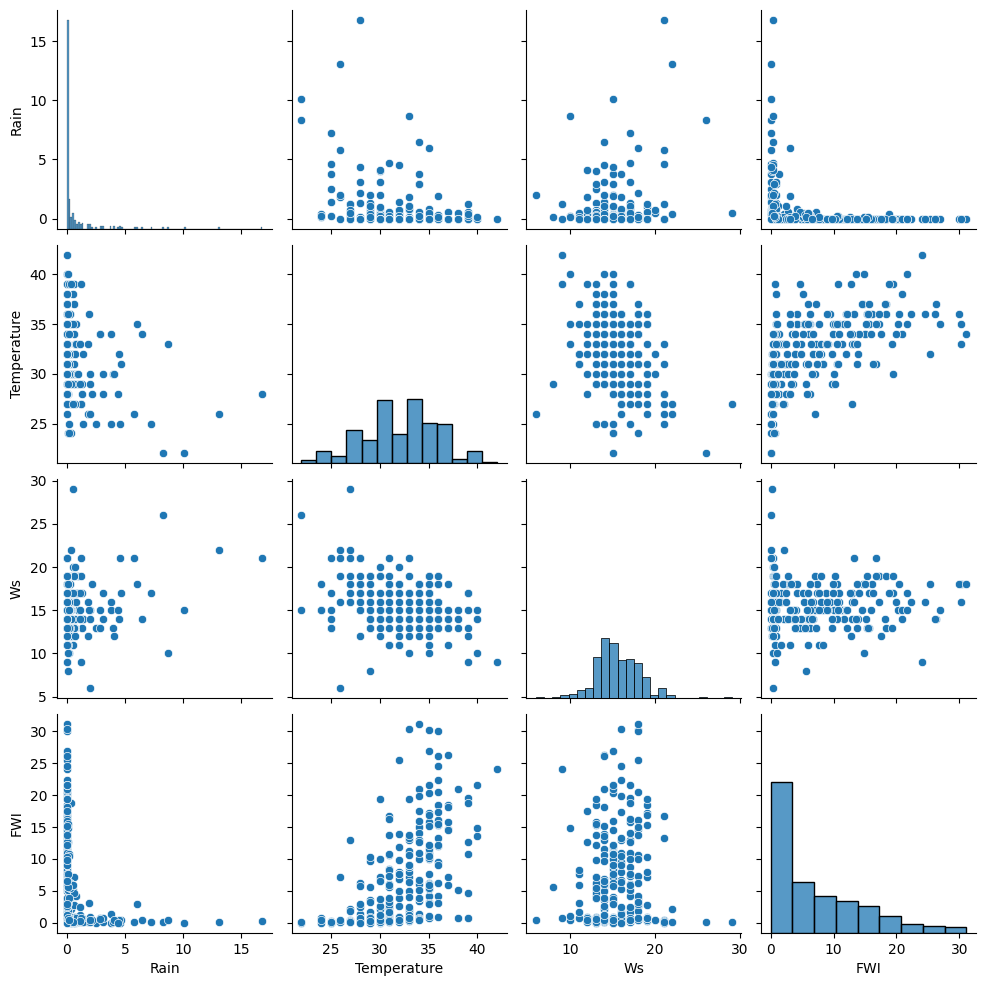

In [16]:

sns.pairplot(df[["Rain", "Temperature", "Ws", "FWI"]])

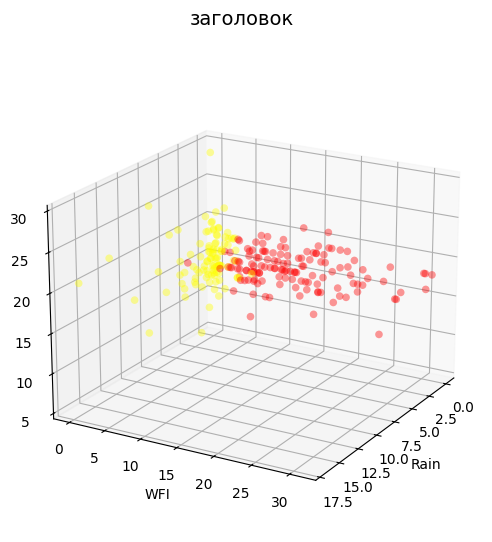

In [ ]:
# Visualizing 6-D mix data using scatter charts
# leveraging the concepts of hue, size, depth and shape
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('заголовок', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(df['Rain'])
ys = list(df['FWI'])
zs = list(df['Ws'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

colors = ['red' if wt == 'fire' else 'green' for wt in list(df['Classes'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Rain')
ax.set_ylabel('WFI')
ax.set_zlabel('Ws')
ax.view_init(elev=20, azim=30)
plt.show()
